
# Willkommen zum Pandas Tutorial

## Übersicht

1. Series vs Dataframe
2. Kreiren einer Series und eines Dataframes
3. Überblick über den Dataframe bekommen
4. Datentransformationen
5. Zugriff auf die Daten(Getting)
6. Daten verändern(Setting)
7. Fehlende Daten
8. Operationen
9. Mergen
10. Gruppieren
11. Plotten
12. Dateien einlesen




## Series vs Dataframe

Benutzt man Pandas arbeitet man mit Series und Dataframes


**Was ist Series?**
* Eine Series ist ein eindimensionaler Array, welcher gelabelt ist
* Kann jeden möglichen Datentyp enthalten
* Lässt sich als Excel Spalter interpretieren

**Was ist ein Dataframe?**
* Series ist die Datenstruktur einer Spalte eines Dataframes
* Ein Dataframe ist somit eine Kollektion aus Series 


## Kreieren einer Series und Dataframes

In [62]:
# Zunächst müssen wir pandas importieren nutzen hierfür eine Abkürzung
import pandas as pd
import numpy as np

In [63]:
#Kreieren einer panda Series durch Zufallszahlen

s = pd.Series(np.random.randn(6))
s

0    2.350095
1    1.089247
2    2.087680
3   -0.319513
4    0.956525
5    1.154537
dtype: float64

* Erhalten 6 standardnormalverteilte Zufallsvariablen und speichern die als Series
* Erhalten die automatisch generierten Indizes 0-6
* Kriegen den Datentyp angezeigt

In [64]:
#Kreieren eines Dataframes

df = pd.DataFrame(np.random.randn(6,4))
df

,0,1,2,3
0,0.248464,-1.072108,-1.643009,0.842001
1,-1.110207,-0.101655,-0.266443,0.339841
2,0.022271,0.610114,0.410932,-1.194710
3,0.782810,0.153902,0.093052,0.914467
4,-0.772312,0.872211,1.014546,-0.390566
5,0.156583,-0.488526,1.542945,0.834170


* Erhalten Dataframe mit 6 Zeilen und 4 Spalten
* automatisierte Spalten und Zeilen

**Wie können wir Spalten und Zeilen benennen?**

In [65]:
df.columns = list('ABCD')
df

,A,B,C,D
0,0.248464,-1.072108,-1.643009,0.842001
1,-1.110207,-0.101655,-0.266443,0.339841
2,0.022271,0.610114,0.410932,-1.194710
3,0.782810,0.153902,0.093052,0.914467
4,-0.772312,0.872211,1.014546,-0.390566
5,0.156583,-0.488526,1.542945,0.834170


In [66]:
#Bennen der Zeilen durch Datum
dates = pd.date_range('20210507',periods=6)
dates 

df.index = dates 
df

,A,B,C,D
2021-05-07,0.248464,-1.072108,-1.643009,0.842001
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841
2021-05-09,0.022271,0.610114,0.410932,-1.194710
2021-05-10,0.782810,0.153902,0.093052,0.914467
2021-05-11,-0.772312,0.872211,1.014546,-0.390566
2021-05-12,0.156583,-0.488526,1.542945,0.834170


**Ist es möglich unsere Spalten und Zeilen bei der Initialisierung schon zu benennen?**

In [67]:
df2 = pd.DataFrame(np.random.randn(6,4), index=dates, columns= list('ABCD'))
df2

,A,B,C,D
2021-05-07,0.223722,-0.435652,1.200340,-1.975572
2021-05-08,0.788443,-1.444661,-1.624933,-0.253192
2021-05-09,1.627713,0.205041,1.684022,-0.749618
2021-05-10,1.083689,-1.237207,-0.193501,0.348388
2021-05-11,-0.018106,1.601226,0.523791,0.974633
2021-05-12,-0.913443,-0.230538,0.196010,0.090358


**Erstellen eines Dataframes durch ein Dictionary**
 

In [68]:
df3 = pd.DataFrame(
    {
        'A':1.0,
        'B':['Hallo','ich','bin','Till'],
        'C': pd.Series(2.5, index=list(range(4)), dtype="float32"),
        'D':np.array([3] * 4, dtype="int32"),
        'E': pd.Categorical(["test", "train", "test", "train"])

    })
df3

,A,B,C,D,E
0,1.0,Hallo,2.5,3,test
1,1.0,ich,2.5,3,train
2,1.0,bin,2.5,3,test
3,1.0,Till,2.5,3,train


In [69]:
#Datentypen ausgeben lassen

df3.dtypes

A     float64
B      object
C     float32
D       int32
E    category
dtype: object

## kleine Zusammenfassung

* Wir sehen, dass jede Spalte verschiedene Datentypen beinhält
* Jede einzelne Spalte ist hierbei eine panda Series 
* die Kollektion aus den Series ergibt dann unseren Dataframe
* Praktisch: Die keys unseres Dictionaries dienen direkt als Spalten des Dataframes 

### Einschub Maps

* pd.maps() wird benutzt um Werte von 2 Series, die eine Spalte gemeinsam haben, aufeinander abzubilden
* nimmt als Input Funktionen, Dictionaries oder Series 
* Für die Abbildung von 2 Series sollte die letzte Spalte der ersten Series der Index Spalte der zweiten Series entsprechen

In [143]:
s = pd.Series(['Döring', 'Roggenkamp', np.nan, 'Schlather'])
s

0        Döring
1    Roggenkamp
2           NaN
3     Schlather
dtype: object

In [144]:
s.map({ 'Roggenkamp' : 'LA1',  'Döring' : 'Ana1'})

0    Ana1
1     LA1
2     NaN
3     NaN
dtype: object

In [145]:
s.map('Gehalten von Professor {}'.format)

0        Gehalten von Professor Döring
1    Gehalten von Professor Roggenkamp
2           Gehalten von Professor nan
3     Gehalten von Professor Schlather
dtype: object

In [147]:
s.map('Gehalten von Professor {}'.format, na_action='ignore' )

0        Gehalten von Professor Döring
1    Gehalten von Professor Roggenkamp
2                                  NaN
3     Gehalten von Professor Schlather
dtype: object

In [163]:
s1 = pd.Series(['Döring', 'Roggenkamp', 'Göttlich', 'Schlather'], name='Professoren', index = ['Semester'] *4)
s1

Semester        Döring
Semester    Roggenkamp
Semester      Göttlich
Semester     Schlather
Name: Professoren, dtype: object

In [164]:
s2 = pd.Series([1, 1, 3, 4], index= ['Döring', 'Roggenkamp', 'Göttlich', 'Schlather'])
s2

Döring        1
Roggenkamp    1
Göttlich      3
Schlather     4
dtype: int64

In [165]:
new = s1.map(s2)
new

Semester    1
Semester    1
Semester    3
Semester    4
Name: Professoren, dtype: int64

## Überblick über unsere Daten bekommen


* Oftmals sehr viele Daten
* oft externe Daten

** Wie bekomme ich einen schnellen Überblick? **

In [70]:
# Ausgabe der ersten n Daten
df.head()


,A,B,C,D
2021-05-07,0.248464,-1.072108,-1.643009,0.842001
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841
2021-05-09,0.022271,0.610114,0.410932,-1.194710
2021-05-10,0.782810,0.153902,0.093052,0.914467
2021-05-11,-0.772312,0.872211,1.014546,-0.390566


In [71]:
#Ausgabe der letzten n Daten
df.tail(2)

,A,B,C,D
2021-05-11,-0.772312,0.872211,1.014546,-0.390566
2021-05-12,0.156583,-0.488526,1.542945,0.834170


In [72]:
#Ausgabe der Indizes 
df.index 

DatetimeIndex(['2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12'],
              dtype='datetime64[ns]', freq='D')

In [73]:
#Ausgabe der Spalten
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [74]:
#Ausgabe einer statischen Übersicht des DataFrames
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.112065,-0.004344,0.192004,0.224200
std,0.700459,0.714839,1.107862,0.852622
min,-1.110207,-1.072108,-1.643009,-1.194710
25%,-0.573666,-0.391809,-0.176569,-0.207964
50%,0.089427,0.026124,0.251992,0.587006
75%,0.225493,0.496061,0.863642,0.840043
max,0.782810,0.872211,1.542945,0.914467


## Kurzer Einschub Pandas vs Numpy

* DataFrame.to_numpy() ermöglicht es die Daten im Numpy Format zu präsentieren
* Spalten haben jedoch verschiedene Datentypen -> müssen alle zum gleichen Datentyp transformiert werden

**Unterschied: Numpy Arrays haben nur einen Datentyp, während Panda Dataframes einen Datentyp pro Spalte haben**

In [75]:
#Umwandlung zu Numpy Array

df.to_numpy()

array([[ 0.24846375, -1.07210793, -1.64300917,  0.84200075],
       [-1.11020674, -0.10165473, -0.26644319,  0.33984062],
       [ 0.0222712 ,  0.61011416,  0.41093188, -1.19470966],
       [ 0.78281017,  0.15390224,  0.09305172,  0.91446693],
       [-0.77231185,  0.87221091,  1.01454595, -0.3905661 ],
       [ 0.15658255, -0.48852643,  1.54294522,  0.83417041]])

In [76]:
#Bei verschiedenen Datentypen eine sehr kostspielige Methode
df3.to_numpy()

array([[1.0, 'Hallo', 2.5, 3, 'test'],
       [1.0, 'ich', 2.5, 3, 'train'],
       [1.0, 'bin', 2.5, 3, 'test'],
       [1.0, 'Till', 2.5, 3, 'train']], dtype=object)

## Datentransformationen

In [77]:
#Transponieren der Daten

df.T

,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12
A,0.248464,-1.110207,0.022271,0.782810,-0.772312,0.156583
B,-1.072108,-0.101655,0.610114,0.153902,0.872211,-0.488526
C,-1.643009,-0.266443,0.410932,0.093052,1.014546,1.542945
D,0.842001,0.339841,-1.194710,0.914467,-0.390566,0.834170


In [78]:
#Sortieren nach Index / Kann ich vielleicht weglassen
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2021-05-07,0.842001,-1.643009,-1.072108,0.248464
2021-05-08,0.339841,-0.266443,-0.101655,-1.110207
2021-05-09,-1.194710,0.410932,0.610114,0.022271
2021-05-10,0.914467,0.093052,0.153902,0.782810
2021-05-11,-0.390566,1.014546,0.872211,-0.772312
2021-05-12,0.834170,1.542945,-0.488526,0.156583


* Axis legt hierbei fest, ob wir uns auf die Spalte oder Reihe beziehen wollen
* Axis = 0 (default) bezieht sich auf die Reihen
* Axis = 1 bezieht sich auf die Spalten 
* Ascending ist per default auf True, wollen wir also absteigend müssen wir es explizit bestimmen

In [79]:
# Sortieren nach Werten 
df.sort_values(by='B',axis=0)

,A,B,C,D
2021-05-07,0.248464,-1.072108,-1.643009,0.842001
2021-05-12,0.156583,-0.488526,1.542945,0.834170
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841
2021-05-10,0.782810,0.153902,0.093052,0.914467
2021-05-09,0.022271,0.610114,0.410932,-1.194710
2021-05-11,-0.772312,0.872211,1.014546,-0.390566


**Anmerkung:**

* Die ganze Reihe wird getauscht 

## Zugriff/Abruf von Daten


**Auswahl einer Spalte**

In [80]:
# Auswahl der Spalte A
df[['A']]

,A
2021-05-07,0.248464
2021-05-08,-1.110207
2021-05-09,0.022271
2021-05-10,0.782810
2021-05-11,-0.772312
2021-05-12,0.156583


In [81]:
#Auswahl mehrerer Reihen über Nummerierung
df[0:3]

,A,B,C,D
2021-05-07,0.248464,-1.072108,-1.643009,0.842001
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841
2021-05-09,0.022271,0.610114,0.410932,-1.194710


In [82]:
#Auswahl mehrerer Reihen über Namen
df["2021-05-07":"2021-05-09"]

,A,B,C,D
2021-05-07,0.248464,-1.072108,-1.643009,0.842001
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841
2021-05-09,0.022271,0.610114,0.410932,-1.194710


**Anmerkung:**

* Auswahl über die Nummerierung lässt die letzte Zeile weg
* Auswahl über die Namen schließt die letzte Zeile mit ein

**Auswahl durch Label**


In [83]:
df.loc[dates[1]]

A   -1.110207
B   -0.101655
C   -0.266443
D    0.339841
Name: 2021-05-08 00:00:00, dtype: float64

**Auswahl verschiedener Achsen durch Label**

In [84]:
# Auswahl der ersten zwei Spalten und aller Zeilen

df.loc[:,['A','B']]

,A,B
2021-05-07,0.248464,-1.072108
2021-05-08,-1.110207,-0.101655
2021-05-09,0.022271,0.610114
2021-05-10,0.782810,0.153902
2021-05-11,-0.772312,0.872211
2021-05-12,0.156583,-0.488526


In [85]:
df.loc['2021-05-07':'2021-05-09','A':'B']

,A,B
2021-05-07,0.248464,-1.072108
2021-05-08,-1.110207,-0.101655
2021-05-09,0.022271,0.610114


**Auch hier sind Endpunkte bei der Auswahl mitinbegriffen**

In [86]:
#Reduktion der Dimension bei dem ausgegebenen Objekt

df.loc['2021-05-07', ['A','B']]

A    0.248464
B   -1.072108
Name: 2021-05-07 00:00:00, dtype: float64

In [87]:
#Für skalare Werte gibt es 2 Möglichkeiten

df.loc[dates[0],'A'] 

0.2484637510300787

In [88]:
#Äquivalente Ausgabe über at
#schnellerer Zugrifff

df.at[dates[0],'A']

0.2484637510300787

**Anmerkung**:

Wir bekommen nur den Wert ohne Index zurückgegeben

## Selektion der Daten über die Position

In [89]:
#Ausgabe der 3ten Zeile
df.iloc[2]


A    0.022271
B    0.610114
C    0.410932
D   -1.194710
Name: 2021-05-09 00:00:00, dtype: float64

In [90]:
#Ausgabe mehrerer Zeilen und Spalten 

df.iloc[1:3,0:2]

,A,B
2021-05-08,-1.110207,-0.101655
2021-05-09,0.022271,0.610114


**Anmerkung:**

Wir sehen, dass die letzte Zeile und Spalte nicht mit ausgegeben wird. Verhält sich dementsprechend wie Python/Numpy

In [91]:
#Ausgabe von Zeilen und Spalten, die nicht hintereinander stehen müssen

df.iloc[[0,2,4],[0,3]]

,A,D
2021-05-07,0.248464,0.842001
2021-05-09,0.022271,-1.194710
2021-05-11,-0.772312,-0.390566


In [92]:
#Auswahl von allen Spalten und bestimmten Zeilen

df.iloc[[2,4],:]

,A,B,C,D
2021-05-09,0.022271,0.610114,0.410932,-1.194710
2021-05-11,-0.772312,0.872211,1.014546,-0.390566


In [93]:
#Auswahl von allen Zeilen und bestimmten Zeilen

df.iloc[:,2:4]

,C,D
2021-05-07,-1.643009,0.842001
2021-05-08,-0.266443,0.339841
2021-05-09,0.410932,-1.194710
2021-05-10,0.093052,0.914467
2021-05-11,1.014546,-0.390566
2021-05-12,1.542945,0.834170


In [94]:
#Reduktion der Dimension (Ausgabe eines Skalars)

df.iloc[2,2]

0.41093188198103414

In [95]:
df.iloc[-1]

A    0.156583
B   -0.488526
C    1.542945
D    0.834170
Name: 2021-05-12 00:00:00, dtype: float64

**Anmerkung:**

* die letzte Zeile und Spalte lässt sich mit -1 adressieren

In [96]:
#Auch hier ist die iat Methode anwendbar

df.iat[2,2]

0.41093188198103414

## Booleand indexing

Bisher haben wir über den Namen oder die Position Daten ausgewählt.

**Was machen wir, wenn wir nur Daten ausgegeben haben wollen, die ein bestimmtes Kriterium erfüllen?**

In [97]:
#Auswahl aller Daten der Spalte B die positiv sind

df[df['B']>0]

,A,B,C,D
2021-05-09,0.022271,0.610114,0.410932,-1.194710
2021-05-10,0.782810,0.153902,0.093052,0.914467
2021-05-11,-0.772312,0.872211,1.014546,-0.390566


In [98]:
#Alle Daten die größer 0 sind
df[df>0]

,A,B,C,D
2021-05-07,0.248464,NaN,NaN,0.842001
2021-05-08,NaN,NaN,NaN,0.339841
2021-05-09,0.022271,0.610114,0.410932,NaN
2021-05-10,0.782810,0.153902,0.093052,0.914467
2021-05-11,NaN,0.872211,1.014546,NaN
2021-05-12,0.156583,NaN,1.542945,0.834170


* Wir sehen, dass wir den ganzen DataFrame zurückgegeben bekommen. 

* Überall wo die Bedingung nicht zutrifft, erhalten wir die Rückgabe NaN

## Daten hinzufügen und ändern

In [99]:
# Initialisieren einer neuen Spalte
df['E'] = [0,1,2,3,4,5]
df

,A,B,C,D,E
2021-05-07,0.248464,-1.072108,-1.643009,0.842001,0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,1
2021-05-09,0.022271,0.610114,0.410932,-1.194710,2
2021-05-10,0.782810,0.153902,0.093052,0.914467,3
2021-05-11,-0.772312,0.872211,1.014546,-0.390566,4
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5


In [100]:
#Bereits existierende Daten dem DataFrame hinzufügen


neu = pd.Series([3,4,2.5,4.3,5.6,6],index=dates)
df['F'] = neu
df

,A,B,C,D,E,F
2021-05-07,0.248464,-1.072108,-1.643009,0.842001,0,3.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,1,4.0
2021-05-09,0.022271,0.610114,0.410932,-1.194710,2,2.5
2021-05-10,0.782810,0.153902,0.093052,0.914467,3,4.3
2021-05-11,-0.772312,0.872211,1.014546,-0.390566,4,5.6
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5,6.0


** Was passiert, wenn wir keinen Index übergeben bzw den Index anders setzen?**

In [101]:
neu = pd.Series([3,4,2.5,4.3,5.6,6])
df['F'] = neu
df


,A,B,C,D,E,F
2021-05-07,0.248464,-1.072108,-1.643009,0.842001,0,NaN
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,1,NaN
2021-05-09,0.022271,0.610114,0.410932,-1.194710,2,NaN
2021-05-10,0.782810,0.153902,0.093052,0.914467,3,NaN
2021-05-11,-0.772312,0.872211,1.014546,-0.390566,4,NaN
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5,NaN


In [102]:
neu = pd.Series([3,4,2.5,4.3,5.6,6],index=pd.date_range('20210508',periods=6))
df['F'] = neu
df

,A,B,C,D,E,F
2021-05-07,0.248464,-1.072108,-1.643009,0.842001,0,NaN
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,1,3.0
2021-05-09,0.022271,0.610114,0.410932,-1.194710,2,4.0
2021-05-10,0.782810,0.153902,0.093052,0.914467,3,2.5
2021-05-11,-0.772312,0.872211,1.014546,-0.390566,4,4.3
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5,5.6


**Anmerkung:**

* Wir stellen fest, dass ohne Indexierung eine Spalte mit NaN erstellt wird
* Beginnt die Indexierung mit einem anderen Wert, dann matcht er die Indizes und setzt den nicht matchenden Index auf NaN

In [103]:
#Verändern einzelner Zellen

df.at[dates[0],'A'] = 55

In [104]:
df.iat[2,2] = 4

In [105]:
df.loc[:,'E'] = np.array([5]*len(df))

In [106]:
df

,A,B,C,D,E,F
2021-05-07,55.000000,-1.072108,-1.643009,0.842001,5,NaN
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0
2021-05-09,0.022271,0.610114,4.000000,-1.194710,5,4.0
2021-05-10,0.782810,0.153902,0.093052,0.914467,5,2.5
2021-05-11,-0.772312,0.872211,1.014546,-0.390566,5,4.3
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5,5.6


**Anmerkung:**

* Die Auswahl findet logischerweise äquivalent zu dem Abschniit davor statt
* Der Wert wird dann einfach über das = gesetzt 

In [107]:
df[df['B']>0] = 2
df

,A,B,C,D,E,F
2021-05-07,55.000000,-1.072108,-1.643009,0.842001,5,NaN
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0
2021-05-09,2.000000,2.000000,2.000000,2.000000,2,2.0
2021-05-10,2.000000,2.000000,2.000000,2.000000,2,2.0
2021-05-11,2.000000,2.000000,2.000000,2.000000,2,2.0
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5,5.6


In [108]:
df.loc[df['B'] > 0,'B'] = 1
df

,A,B,C,D,E,F
2021-05-07,55.000000,-1.072108,-1.643009,0.842001,5,NaN
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0
2021-05-11,2.000000,1.000000,2.000000,2.000000,2,2.0
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5,5.6


**Anmerkung:**

* Auch die Auswahl über Boolean Werte ist möglich 

**Spalten wegwerfen**


In [109]:
df.drop('F',axis=1)

,A,B,C,D,E
2021-05-07,55.000000,-1.072108,-1.643009,0.842001,5
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5
2021-05-09,2.000000,1.000000,2.000000,2.000000,2
2021-05-10,2.000000,1.000000,2.000000,2.000000,2
2021-05-11,2.000000,1.000000,2.000000,2.000000,2
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5


## Fehlende Daten


In [110]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+ ['H'])

df1.loc[dates[0]:dates[1],'H'] = 1

df1

,A,B,C,D,E,F,H
2021-05-07,55.000000,-1.072108,-1.643009,0.842001,5,NaN,1.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,NaN
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,NaN


In [111]:
# Alle Daten mit fehlenden Werten rauswerfen
df1.dropna()

,A,B,C,D,E,F,H
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0


In [112]:
df1

,A,B,C,D,E,F,H
2021-05-07,55.000000,-1.072108,-1.643009,0.842001,5,NaN,1.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,NaN
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,NaN


**Anmerkung:**

Wir haben unseren DataFrame nicht überschrieben

In [113]:
df2 = df1.copy()

df2.dropna(inplace=True)

df2

,A,B,C,D,E,F,H
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0


* Der Befehl inplace sagt uns, ob wir den DataFrame überschreiben sollen oder nicht.

* Der default-Wert ist hierbei False

**Anmerkung:**

* Passt auf, wenn ihr einen Datensatz über = kopiert
* Ihr überschreibt beide Datensätze, wenn ihr nur die Kopie verändert
* Kann zu bösen Fehlern führen
* Passiert nicht, wenn ihr die Methode copy() verwendet

In [134]:
df1

,A,B,C,D,E,F,H
2021-05-07,3.000000,3.000000,3.000000,3.000000,3,3.0,3.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0


In [135]:
dfcop = df1.copy()
dfcop.loc[dates[0]] = 4
dfcop

,A,B,C,D,E,F,H
2021-05-07,4.000000,4.000000,4.000000,4.000000,4,4.0,4.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0


In [136]:
df1

,A,B,C,D,E,F,H
2021-05-07,3.000000,3.000000,3.000000,3.000000,3,3.0,3.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0


In [116]:
# Ausfüllen von NA's

df1.fillna(value=3)

,A,B,C,D,E,F,H
2021-05-07,3.000000,3.000000,3.000000,3.000000,3,3.0,3.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0


In [117]:
#Booleansche Ausgabe aller Werte 
df1.isna()

,A,B,C,D,E,F,H
2021-05-07,False,False,False,False,False,False,False
2021-05-08,False,False,False,False,False,False,False
2021-05-09,False,False,False,False,False,False,True
2021-05-10,False,False,False,False,False,False,True


## Operationen mit DataFrames

In [118]:
#Durschnitt berechnen
df1.mean()

A    1.472448
B    1.224586
C    1.683389
D    1.834960
E    3.000000
F    2.500000
H    2.000000
dtype: float64

In [119]:
df1.mean(axis=1)

2021-05-07    3.000000
2021-05-08    1.123077
2021-05-09    1.833333
2021-05-10    1.833333
Freq: D, dtype: float64

In [120]:
df1.loc[:,'B'].mean()

1.2245863174364815

**Anmerkung:**

* Der default Wert bezieht sich wieder auf die Spalten
* Über den axis Befehl können wir auswählen, ob wir den Durschnitt bezüglich der Spalten oder Reihen ausgegeben haben wollen
* Auch hier können wir wieder nur bestimmte Zeilen oder Spalten für die Operationen auswählen

In [121]:
# Apply Funktion
df1.fillna(3,inplace=True)

df1.apply(np.cumsum)

,A,B,C,D,E,F,H
2021-05-07,3.000000,3.000000,3.000000,3.000000,3,3.0,3.0
2021-05-08,1.889793,2.898345,2.733557,3.339841,8,6.0,4.0
2021-05-09,3.889793,3.898345,4.733557,5.339841,10,8.0,7.0
2021-05-10,5.889793,4.898345,6.733557,7.339841,12,10.0,10.0


In [122]:
df1.apply(lambda x: x.mean() - x.min())

A    2.582655
B    1.326241
C    1.949832
D    1.495120
E    1.000000
F    0.500000
H    1.500000
dtype: float64

In [123]:
# Wie oft kommt ein Wert in einer Spalte vor
df1['A'].value_counts()

 2.000000    2
 3.000000    1
-1.110207    1
Name: A, dtype: int64

**String Methoden**


In [124]:
s = pd.Series(['A','D',np.nan,'HAllo','DHGasG'])

s.str.lower()

0         a
1         d
2       NaN
3     hallo
4    dhgasg
dtype: object

In [125]:
s.str.upper()

0         A
1         D
2       NaN
3     HALLO
4    DHGASG
dtype: object

**Mergen von Panda Objekten**

In [126]:
pd.concat([df,df1])

,A,B,C,D,E,F,H
2021-05-07,55.000000,-1.072108,-1.643009,0.842001,5,NaN,NaN
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,NaN
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,NaN
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,NaN
2021-05-11,2.000000,1.000000,2.000000,2.000000,2,2.0,NaN
2021-05-12,0.156583,-0.488526,1.542945,0.834170,5,5.6,NaN
2021-05-07,3.000000,3.000000,3.000000,3.000000,3,3.0,3.0
2021-05-08,-1.110207,-0.101655,-0.266443,0.339841,5,3.0,1.0
2021-05-09,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0
2021-05-10,2.000000,1.000000,2.000000,2.000000,2,2.0,3.0


**Gruppieren des DataFrames**

In [127]:
#Erstellen eines neuen DataFrames durch ein Dictionary

df = pd.DataFrame(
    {
        'A': ['ha','TT','ha','TT','ha','TT'],
        'B': ['eins','zwei','drei','eins','zwei','drei'],
        'C': np.random.randn(6),
        'D': np.random.randn(6),
    }
)
df

,A,B,C,D
0,ha,eins,0.683902,1.872100
1,TT,zwei,-0.336767,-0.122947
2,ha,drei,-1.328707,1.153651
3,TT,eins,1.845219,2.111934
4,ha,zwei,-2.001049,-1.737676
5,TT,drei,-0.854593,-1.347009


** Wie können wir jetzt Operationen nur auf bestimmte Gruppen anwenden?**

In [128]:
#Berechnen der Summe der gruppierten Daten
df.groupby('A').sum()

,C,D
A,,
TT,0.653858,0.641977
ha,-2.645854,1.288074


**Anmerkung:**

* Die Spalte A wird in die 2 Gruppen 'TT' und  'ha unterteilt und dann wird pro Spalte die Summe gebildet
* Es lässt sich auch nach mehreren Sachen gruppieren hier jedoch nicht sinnvoll

## Plotten

In [129]:
#Hierfür importieren wir zunächst Matplotlib
import matplotlib.pyplot as plt


<AxesSubplot:>

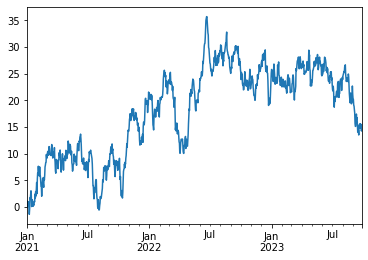

In [130]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('20210101',periods=1000))

ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

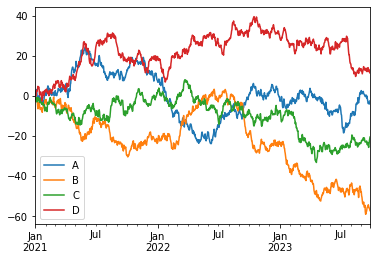

In [131]:
df = pd.DataFrame(
        np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
    )
    

df = df.cumsum()

plt.figure()


df.plot()

plt.legend(loc='best')

plt.show()

## Einlesen von Dateien 

In [132]:
stocks = pd.read_csv("/Users/tillfreihaut/Downloads/archive/prices.csv", parse_dates=['date'])
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date')
stocks.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tillfreihaut/Downloads/archive/prices.csv'

**Es gibt viele Optionen, wie die Dateien eingelesen werden soll, kann die Bearbeitung der Daten wesentlich vereinfachen**

* z.B kann über den Befehl decimal = bestimmt werden, wie dezimal Zahlen gelesen werden sollen. decimal= ',' liest auch 5,6 als 5.6
* sep = sagt wie Daten getrennt werden sollen 
* viele Optionen mehr gehen nicht auf EInzelheiten ein, aber merkt euch, dass ihr euch schon beim Einlesen durch den richtigen Befehl Arbeit sparen könnt

**Noch mehr Plots **

<AxesSubplot:xlabel='date'>

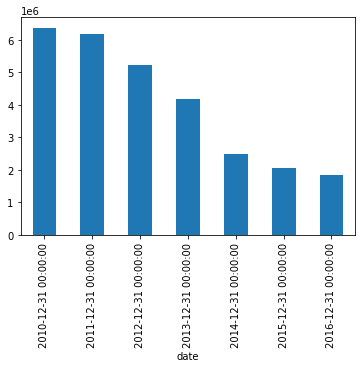

In [9]:
stocks['volume'].resample('Y').mean().plot.bar()

**Anmerkung:**

* resample sortiert die Daten nach den Jahren und plottet somit das Volumen der verschiedenen Jahre

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

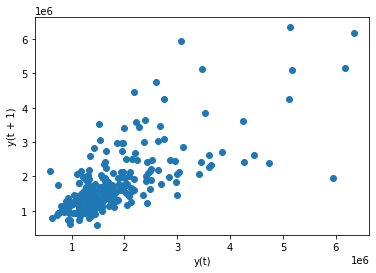

In [13]:
from pandas.plotting import lag_plot

lag_plot(stocks['volume'].tail(250))

**Lag plot:**

* vergleicht Daten aus der Periode mit der vorherigen Periode z.B. Daten vom 21.Dezember werden mit Daten vom 20.Dezember verglichen und diese mit dem 19. Dezember und so weiter 
* In unserem Beispiel wird das Volumen der Trades mit dem vorherigen Volumen verglichen 
* In unserem Plot erkennen wir, dass falls das Volumen am Vortag hoch ist, dann wird auch das Volumen am Folgetag hoch sein
* Lag plots ermöglichen es eine Periodizität in den Zeitreihen Daten zu erkennen 



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

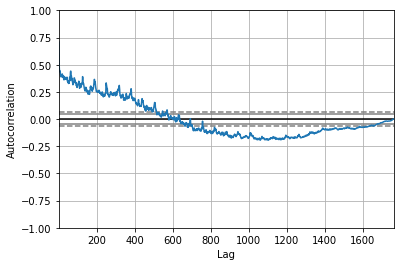

In [14]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])

**Autocorrelation plot:**

* ermöglicht es jede mögliche Periodizität zur gleichen Zeit zu überprüfen
* auf der X Achse ist das Lag zu sehen und auf der y-Achse die Autokorrelation
* je weiter weg von der 0 der Graph ist, desto größer ist der Einfluss